In [1]:
import numpy as np
import matplotlib.pyplot as plt
from stochpy.dynamics.diffusion import Wiener, OrnsteinUhlenbeck

In [2]:
np.random.seed(seed=100)

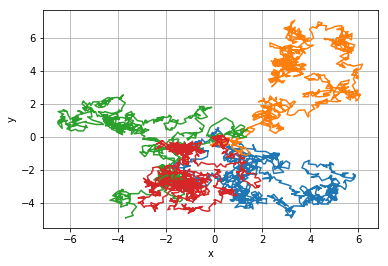

In [3]:
ax = plt.axes()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
for _ in range(4):
    t, x = Wiener(2).trajectory(np.array([0.,0.]),0.,dt=0.01)
    ax.plot(x[:,0],x[:,1])
plt.show()

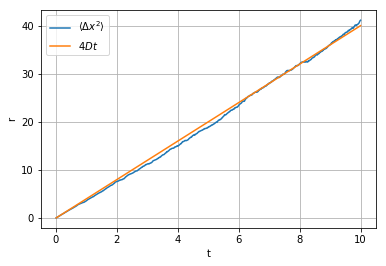

In [4]:
time, dist2 = zip(*[(t,r) for t,r in Wiener(2).sample_mean(np.array([0.,0.]), 0., 1000, 1000, dt=0.01, 
                                                           observable=lambda x, t: x[0]**2+x[1]**2)])
ax = plt.axes()
ax.set_xlabel('t')
ax.set_ylabel('r')
ax.grid()
ax.plot(time, dist2, label=r'$\langle \Delta x^2 \rangle$')
ax.plot(time, 4*np.array(time), label=r'$4Dt$')
ax.legend()
plt.show()

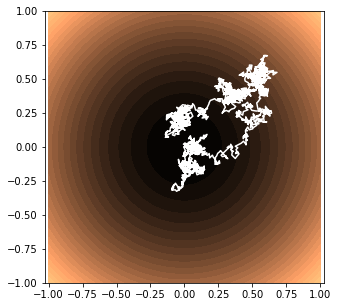

In [5]:
model = OrnsteinUhlenbeck(0,1, 0.1, 2)
xvec = np.linspace(-1., 1.)
yvec = np.linspace(-1., 1.)
potential = np.array([model.potential(np.array([x, y])) for x in xvec for y in yvec]).reshape(50, 50)
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.grid(False)
ax.axis('equal')
ax.contourf(xvec, yvec, potential, 30, cmap='copper')
t, x = model.trajectory(np.array([0., 0.]), 0., T=2, dt=0.001)
ax.plot(x[:,0], x[:,1], color='white')
plt.show()